# Canadian Banks Stock Data Analysis
### Authors: Mariia-Olena Zhupnyk & Mariia Shekhovtsova

## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Collection](#2-data-collection)
   - [Install and Import Libraries](#21-import-libraries)
   - [Scrape Data for Selected Banks](#23-scrape-data-for-selected-banks)
3. [Data Preprocessing & Cleaning](#3-data-preprocessing--cleaning)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
5. [Statistical Analysis & Financial Metrics](#5-statistical-analysis--financial-metrics)
6. [Power BI Dashboard](#6-power-bi-dashboard)
7. [Conclusion & Insights](#7-conclusion--insights)

## 1. Introduction

The purpose of this project is to analyze the stock performance of Canada’s leading banks — **BMO, CIBC, TD, RBC, and Scotiabank** — over the past five years. Through this analysis, we aim to provide data-driven insights into market trends, investment risks, and stock relationships. The findings can support investors, analysts, and financial professionals in making informed decisions.

### Objectives:
- **[Stock Market Performance Analysis](#4-exploratory-data-analysis-eda)** – Evaluating stock trends and overall performance.
- **[Volatility Assessment](#5-statistical-analysis--financial-metrics)** – Measuring price fluctuations to identify risk levels and market stability.
- **[Stock Price Correlation](#5-statistical-analysis--financial-metrics)** – Examining relationships between different banks' stock prices.
- **[Prediction Model Development](#5-statistical-analysis--financial-metrics)** – Building a predictive model to forecast stock trends and help investors determine which bank is more stable or offers better returns.

We collect stock price data and financial statements from [Yahoo Finance](https://finance.yahoo.com/), process them using Python, store them in a PostgreSQL database, and visualize insights using Power BI.

## 2. Data Collection

### 2.1 Install and Import Libraries

In [1]:
%%capture
!pip install yfinance
!pip install yahooquery
%pip install matplotlib
!pip install seaborn

In [2]:
import yfinance as yf
from yahooquery import Ticker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 2.2 Scrape Data for Selected Banks

#### Scrape Historical stock prices

In [4]:
# Step 1: Define the tickers for Canadian banks
bank_tickers = {
    "TD": "TD.TO",
    "BMO": "BMO.TO",
    "RBC": "RY.TO",
    "CIBC": "CM.TO",
    "Scotiabank": "BNS.TO"
}

In [35]:
# Step 2: Download historical stock prices
historical_data = {}
for bank, ticker in bank_tickers.items():
    print(f"Downloading historical data for {bank} ({ticker})...")
    historical_data[bank] = yf.download(ticker, start="2020-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

In [36]:
# Step 3: Save historical data to CSV
for bank, data in historical_data.items():
    data.to_csv(f"{bank}_historical_data.csv")
    print(f"Saved historical data for {bank} to {bank}_historical_data.csv")

Saved historical data for TD to TD_historical_data.csv
Saved historical data for BMO to BMO_historical_data.csv
Saved historical data for RBC to RBC_historical_data.csv
Saved historical data for CIBC to CIBC_historical_data.csv
Saved historical data for Scotiabank to Scotiabank_historical_data.csv


In [37]:
# Step 4: Fetch financial data (e.g., market cap, PE ratio, dividend yield)
financial_data = {}
for bank, ticker in bank_tickers.items():
    print(f"Fetching financial data for {bank} ({ticker})...")
    stock = yf.Ticker(ticker)
    financial_data[bank] = {
        "Market Cap": stock.info.get("marketCap"),
        "PE Ratio": stock.info.get("trailingPE"),
        "Dividend Yield": stock.info.get("dividendYield"),
        "Beta": stock.info.get("beta"),
    }

Fetching financial data for TD (TD.TO)...
Fetching financial data for BMO (BMO.TO)...
Fetching financial data for RBC (RY.TO)...
Fetching financial data for CIBC (CM.TO)...
Fetching financial data for Scotiabank (BNS.TO)...


In [38]:
# Step 5: Save financial data to CSV
financial_df = pd.DataFrame(financial_data).transpose()
financial_df.to_csv("financial_data.csv")
print("Saved financial data to financial_data.csv")

Saved financial data to financial_data.csv


In [39]:
# Step 6: Preview the saved data
print("Sample historical data for TD:")
print(historical_data["TD"].head())

Sample historical data for TD:
Price           Close       High        Low       Open   Volume
Ticker          TD.TO      TD.TO      TD.TO      TD.TO    TD.TO
Date                                                           
2020-01-02  57.946808  57.994167  57.560077  57.781066  2207900
2020-01-03  57.899429  57.946782  57.544269  57.678440  3472900
2020-01-06  57.907352  57.986276  57.583757  57.615327  8359000
2020-01-07  57.844193  58.175676  57.788945  58.017829  3622600
2020-01-08  58.294071  58.562414  57.796845  57.867875  6465500


In [40]:
print("\nFinancial data:")
print(financial_df)


Financial data:
              Market Cap   PE Ratio  Dividend Yield   Beta
TD          1.435082e+11  17.372883          0.0512  0.822
BMO         1.018065e+11  14.665615          0.0462  1.160
RBC         2.403518e+11  15.391304          0.0323  0.842
CIBC        8.322114e+10  12.130494          0.0402  1.128
Scotiabank  9.780933e+10  12.243612          0.0531  0.978


#### Scrape financial data for each bank

In [41]:
# Function to scrape financial data for each bank
def scrape_financial_data():
    for bank, ticker in bank_tickers.items():
        print(f"Scraping financial data for {bank} ({ticker})...")

        # Create Ticker object
        stock = Ticker(ticker)

        # Get financial data
        income_statement = stock.income_statement()
        balance_sheet = stock.balance_sheet()
        cash_flow = stock.cash_flow()

        # Fetch dividends using the history method
        dividends = stock.history(period="max")  # Get full historical data
        dividends = dividends[dividends.index.get_level_values("symbol") == ticker]  # Filter for current ticker
        dividends = dividends[["dividends"]]  # Select only dividends column

        # Convert to DataFrame and save as CSV
        pd.DataFrame(income_statement).to_csv(f"{bank}_income_statement.csv", index=False)
        pd.DataFrame(balance_sheet).to_csv(f"{bank}_balance_sheet.csv", index=False)
        pd.DataFrame(cash_flow).to_csv(f"{bank}_cash_flow.csv", index=False)
        
        if not dividends.empty:
            dividends.to_csv(f"{bank}_dividends.csv")

        print(f"Data saved for {bank} ✅")

In [42]:
# Run the scraper
scrape_financial_data()

Scraping financial data for TD (TD.TO)...
Data saved for TD ✅
Scraping financial data for BMO (BMO.TO)...
Data saved for BMO ✅
Scraping financial data for RBC (RY.TO)...
Data saved for RBC ✅
Scraping financial data for CIBC (CM.TO)...
Data saved for CIBC ✅
Scraping financial data for Scotiabank (BNS.TO)...
Data saved for Scotiabank ✅


### Initial Data Inspection

In [5]:
#Load one of the historical CSV files (e.g., TD_historical_data.csv) and explore it
td_data = pd.read_csv("D:\canadian_banks_stock_data\canadian_banks_stock_data\TD_historical_data.csv")

In [6]:
td_data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TD.TO,TD.TO,TD.TO,TD.TO,TD.TO
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,57.946807861328125,57.99416701667758,57.560076551433816,57.78106587137342,2207900
3,2020-01-03,57.89942932128906,57.94678243435267,57.54426893030253,57.67844009831924,3472900
4,2020-01-06,57.907352447509766,57.986276349218535,57.583756622543774,57.61532738752883,8359000


In [49]:
 # Check for missing values
print("\nMissing values in TD data:")
print(td_data.isnull().sum())


Missing values in TD data:
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [50]:
# Drop the first 2 row
td_data = td_data.iloc[2:].reset_index(drop=True)
td_data

,Price,Close,High,Low,Open,Volume
0,2020-01-02,57.946807861328125,57.99416701667758,57.560076551433816,57.78106587137342,2207900
1,2020-01-03,57.89942932128906,57.94678243435267,57.54426893030253,57.67844009831924,3472900
2,2020-01-06,57.907352447509766,57.986276349218535,57.583756622543774,57.61532738752883,8359000
3,2020-01-07,57.84419250488281,58.17567639944808,57.78894518912193,58.0178286462758,3622600
4,2020-01-08,58.294071197509766,58.56241360969641,57.79684530471935,57.867874994472366,6465500
...,...,...,...,...,...,...
1250,2024-12-23,74.59191131591797,74.61163870401722,73.73362316363925,73.9901243689176,5763300
1251,2024-12-24,75.1937026977539,75.25289239220729,74.48339625765291,75.1937026977539,1345700
1252,2024-12-27,75.39100646972656,75.61791284222221,75.07531555581855,75.12464531882436,5200200
1253,2024-12-30,75.20356750488281,75.51925840861496,74.83854683973492,74.97666113970118,14855800


In [51]:
# Rename columns
td_data.columns = ["date", "close_price", "high_price", "low_price", "open_price", "volume"]
td_data

,date,close_price,high_price,low_price,open_price,volume
0,2020-01-02,57.946807861328125,57.99416701667758,57.560076551433816,57.78106587137342,2207900
1,2020-01-03,57.89942932128906,57.94678243435267,57.54426893030253,57.67844009831924,3472900
2,2020-01-06,57.907352447509766,57.986276349218535,57.583756622543774,57.61532738752883,8359000
3,2020-01-07,57.84419250488281,58.17567639944808,57.78894518912193,58.0178286462758,3622600
4,2020-01-08,58.294071197509766,58.56241360969641,57.79684530471935,57.867874994472366,6465500
...,...,...,...,...,...,...
1250,2024-12-23,74.59191131591797,74.61163870401722,73.73362316363925,73.9901243689176,5763300
1251,2024-12-24,75.1937026977539,75.25289239220729,74.48339625765291,75.1937026977539,1345700
1252,2024-12-27,75.39100646972656,75.61791284222221,75.07531555581855,75.12464531882436,5200200
1253,2024-12-30,75.20356750488281,75.51925840861496,74.83854683973492,74.97666113970118,14855800


### Set Up Database Connection

In [7]:
!pip install python-dotenv

In [8]:
import os
import psycopg2
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

# Get credentials from environment variables
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")

# Print to verify (remove in production)
print(f"Connected to database: {DB_NAME} at {DB_HOST}")

# Connect to the database
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

Connected to database: stock at 10.243.191.45


###  Inserting data row-by-row into PostgreSQL database

In [25]:
%%capture
! pip install psycopg2 pandas

In [22]:
import os
import pandas as pd
import psycopg2

In [24]:
# Folder containing historical data CSV files
csv_folder = "D:\\CANADIAN_BANKS_STOCK_DATA"

# Bank tickers for TD, Scotiabank, and RBC
bank_tickers = {
    "TD": "TD.TO",
    "Scotiabank": "BNS.TO",
    "RBC": "RY.TO"
}

try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT
    )
    cursor = conn.cursor()

    # SQL Query to Insert Data
    insert_query = """
    INSERT INTO stock_prices (stock_ticker, date, open_price, high_price, low_price, close_price, volume)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
    """

    # Process only historical data for TD, Scotiabank, and RBC
    for bank, ticker in bank_tickers.items():
        file_path = os.path.join(csv_folder, f"{bank}_historical_data.csv")

        if os.path.exists(file_path):  # Check if file exists
            df = pd.read_csv(file_path, skiprows=2)  # Skip first 2 rows

            # Rename columns to match database schema
            df.columns = ["date", "close_price", "high_price", "low_price", "open_price", "volume"]

            # Insert data row by row (without data type conversion)
            for _, row in df.iterrows():
                cursor.execute(insert_query, (ticker, row["date"], row["open_price"], row["high_price"],
                                              row["low_price"], row["close_price"], row["volume"]))

            conn.commit()
            print(f"✅ Data inserted successfully for {bank} ({ticker})")

    # Close database connection
    cursor.close()
    conn.close()

except Exception as e:
    print("❌ Error inserting data:", e)

✅ Data inserted successfully for TD (TD.TO)
✅ Data inserted successfully for Scotiabank (BNS.TO)
✅ Data inserted successfully for RBC (RY.TO)


## Exploratory Data Analysis (EDA)

Purpose of analysis:
- Build moving average of banks stocks
- Determine correlations between stock returns
- Try to predict the future behavior of the stocks

In [4]:
# load data
df = pd.read_csv('stock_prices.csv')
df

,st_pr_id,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,1,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,2,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,3,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,4,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,5,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900
...,...,...,...,...,...,...,...,...
6268,6269,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200
6269,6270,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300
6270,6271,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800
6271,6272,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600


In [7]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   st_pr_id      6273 non-null   int64  
 1   stock_ticker  6273 non-null   object 
 2   date          6273 non-null   object 
 3   close_price   6273 non-null   float64
 4   high_price    6273 non-null   float64
 5   low_price     6273 non-null   float64
 6   open_price    6273 non-null   float64
 7   volume        6273 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 392.2+ KB
None


In [8]:
df.head()

,st_pr_id,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,1,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,2,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,3,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,4,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,5,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900


In [9]:
# Drop Unnecessary Columns
df.drop(columns=["st_pr_id"], inplace=True)
df

,stock_ticker,date,close_price,high_price,low_price,open_price,volume
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900
...,...,...,...,...,...,...,...
6268,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200
6269,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300
6270,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800
6271,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600


In [10]:
# Convert Date Column to DateTime Format
df["date"] = pd.to_datetime(df["date"])
print(df.dtypes)

stock_ticker            object
date            datetime64[ns]
close_price            float64
high_price             float64
low_price              float64
open_price             float64
volume                   int64
dtype: object


In [11]:
#Check for Missing Values
print(df.isnull().sum())

stock_ticker    0
date            0
close_price     0
high_price      0
low_price       0
open_price      0
volume          0
dtype: int64


#### Descriptive Statistics about the Data
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [12]:
df.describe()

,date,close_price,high_price,low_price,open_price,volume
count,6273,6273.000000,6273.000000,6273.000000,6273.000000,6.273000e+03
mean,2022-07-01 15:24:25.136298240,80.389468,80.931078,79.811136,80.359042,4.175782e+06
min,2020-01-02 00:00:00,25.911804,28.073357,25.877310,27.440987,2.157000e+05
25%,2021-04-01 00:00:00,56.463879,56.818015,56.027343,56.456757,2.257200e+06
50%,2022-06-30 00:00:00,73.648445,74.145484,73.155671,73.643317,3.363200e+06
75%,2023-10-02 00:00:00,109.846405,110.574856,109.124842,109.903316,5.103700e+06
max,2024-12-31 00:00:00,179.570007,180.449997,178.440002,179.940002,2.883860e+07
std,NaN,30.385350,30.516353,30.213970,30.346333,2.939800e+06


## Moving Averages

### Calculate Simple Moving Average (SMA)
A moving average is a technical indicator that market analysts and investors may use to determine the direction of a trend. It sums up the data points of a financial security over a specific time period and divides the total by the number of data points to arrive at an average.

A **Simple Moving Average (SMA)** smooths price data by calculating the average over a specific window.

An **Exponential Moving Average (EMA)** gives more weight to recent prices.

In [13]:
# Define moving average windows
sma_windows = [50, 100, 500]

# Calculate SMA for each window
for window in sma_windows:
    df[f"SMA_{window}"] = df.groupby("stock_ticker")["close_price"].transform(lambda x: x.rolling(window).mean())

# Display sample data
df.head(30)


,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN
5,BMO.TO,2020-01-10,80.933800,81.053502,80.566718,80.909861,1243400,NaN,NaN,NaN
6,BMO.TO,2020-01-13,81.556236,81.556236,80.702370,80.933792,4100400,NaN,NaN,NaN
7,BMO.TO,2020-01-14,81.963219,82.019079,81.396635,81.564216,1923500,NaN,NaN,NaN
8,BMO.TO,2020-01-15,82.202637,82.330315,81.907372,81.915354,1729600,NaN,NaN,NaN
9,BMO.TO,2020-01-16,82.481926,82.585665,82.202625,82.338285,1809800,NaN,NaN,NaN


The NaN values appear because the Simple Moving Average (SMA) requires enough data points to calculate the rolling mean. Here’s why:

A 10-day SMA needs at least 10 days of data before it produces a value.
A 50-day SMA needs 50 days, and so on.
Since the first few rows don’t have enough past data points, they show NaN.

In [14]:
# Calculate EMA for each window
for window in sma_windows:
    df[f"EMA_{window}"] = df.groupby("stock_ticker")["close_price"].transform(lambda x: x.ewm(span=window, adjust=False).mean())

df.head(30)


,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500,EMA_50,EMA_100,EMA_500
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN,80.279427,80.279427,80.279427
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN,80.276924,80.278163,80.279172
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN,80.269199,80.274237,80.278376
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN,80.284622,80.281926,80.279910
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN,80.311019,80.295308,80.282616
5,BMO.TO,2020-01-10,80.933800,81.053502,80.566718,80.909861,1243400,NaN,NaN,NaN,80.335442,80.307952,80.285215
6,BMO.TO,2020-01-13,81.556236,81.556236,80.702370,80.933792,4100400,NaN,NaN,NaN,80.383316,80.332670,80.290289
7,BMO.TO,2020-01-14,81.963219,82.019079,81.396635,81.564216,1923500,NaN,NaN,NaN,80.445273,80.364958,80.296968
8,BMO.TO,2020-01-15,82.202637,82.330315,81.907372,81.915354,1729600,NaN,NaN,NaN,80.514190,80.401348,80.304575
9,BMO.TO,2020-01-16,82.481926,82.585665,82.202625,82.338285,1809800,NaN,NaN,NaN,80.591356,80.442548,80.313267


#### Plot Moving Averages

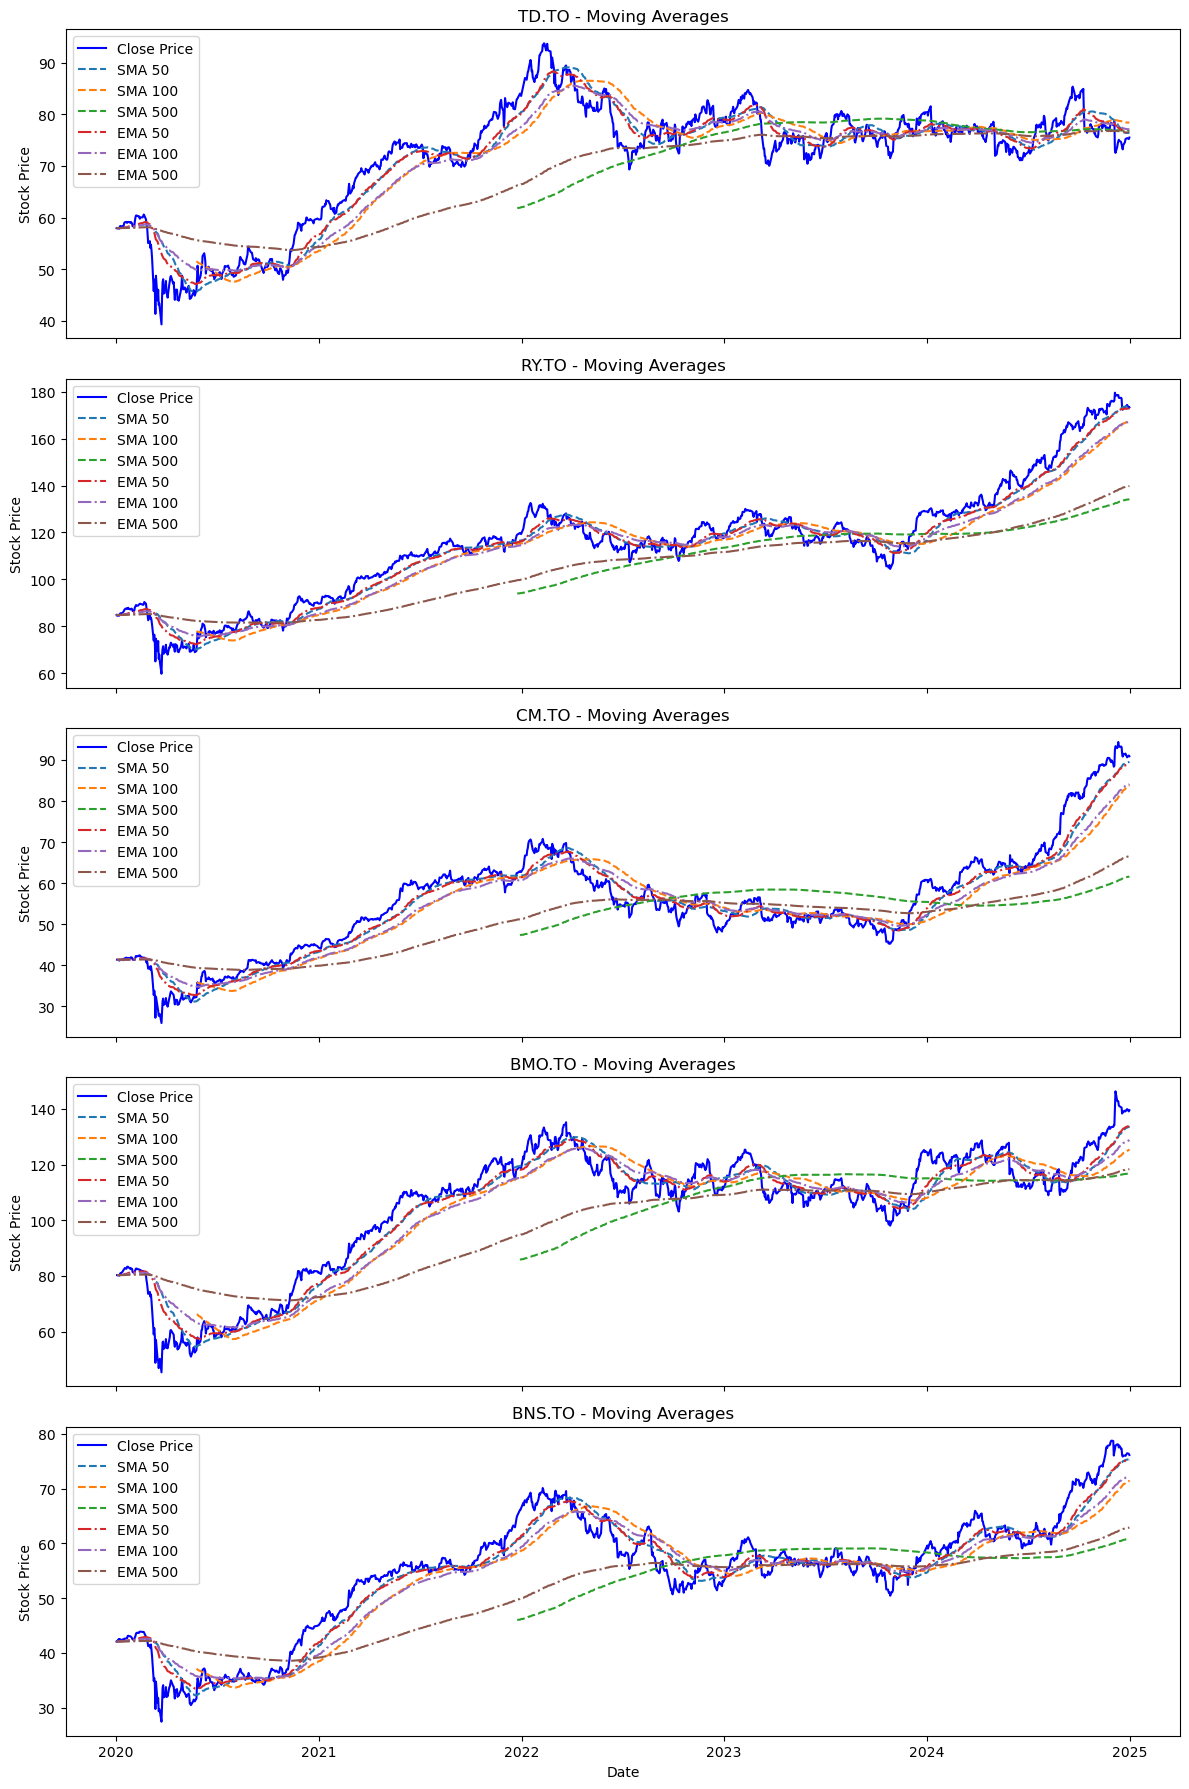

In [15]:
import matplotlib.pyplot as plt

# Define bank tickers
bank_tickers = ["TD.TO", "RY.TO", "CM.TO", "BMO.TO", "BNS.TO"]
sma_windows = [50, 100, 500]  # Different SMA periods
ema_windows = [50, 100, 500]  # Different EMA periods

# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18), sharex=True)

# Loop through banks and plot on separate axes
for i, stock in enumerate(bank_tickers):
    stock_data = df[df["stock_ticker"] == stock]
    
    axes[i].plot(stock_data["date"], stock_data["close_price"], label="Close Price", color="blue")
    
    # Plot multiple SMA and EMA lines
    for window in sma_windows:
        axes[i].plot(stock_data["date"], stock_data[f"SMA_{window}"], label=f"SMA {window}", linestyle="--")

    for window in ema_windows:
        axes[i].plot(stock_data["date"], stock_data[f"EMA_{window}"], label=f"EMA {window}", linestyle="-.")

    axes[i].set_title(f"{stock} - Moving Averages")
    axes[i].set_ylabel("Stock Price")
    axes[i].legend()

axes[-1].set_xlabel("Date")  # Add x-label only to the last subplot
plt.tight_layout()
plt.show()


This visualization compares the moving averages of five major Canadian banks (TD.TO, RY.TO, CM.TO, BMO.TO, and BNS.TO) over the past few years. The chart includes Simple Moving Averages (SMA) and Exponential Moving Averages (EMA) with different time windows (10, 50, 100, and 200 days).

**Key Observations:**
General Market Trends:

- All five banks show long-term upward trends, indicating growth over time.
- The stock prices exhibit periods of volatility, with occasional downturns followed by recoveries.
- Short-term SMAs (10, 50 days) are more sensitive to price movements, while long-term SMAs (100, 200 days) smooth out fluctuations.

**Bank-Specific Insights:**

- TD.TO (Toronto-Dominion Bank): Price movements have been relatively stable since 2022, with no sharp trends. The stock remains close to its long-term moving averages, indicating a consolidation phase.
- RY.TO (Royal Bank of Canada): Shows a strong upward trend, with prices consistently above long-term moving averages, suggesting continued growth.
- CM.TO (CIBC): The stock experienced sideways movement in earlier years but surged significantly in the latest period, with SMAs and EMAs diverging.
- BMO.TO (Bank of Montreal): Displays steady growth, but with more volatility compared to other banks. The price remains above long-term moving averages.
- BNS.TO (Scotiabank): Exhibits an upward trend, but with more pronounced fluctuations. The moving averages are well-aligned, reflecting market stability.

**Conclusion:**
RY.TO and CM.TO have the strongest upward momentum, indicating investor confidence and potential long-term growth.
TD.TO and BMO.TO are relatively stable, with price movements showing less dramatic trends.
BNS.TO shows volatility but maintains a general upward trajectory.
The long-term SMAs and EMAs confirm that Canadian banks have been growing steadily, though they experience short-term fluctuations.

### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

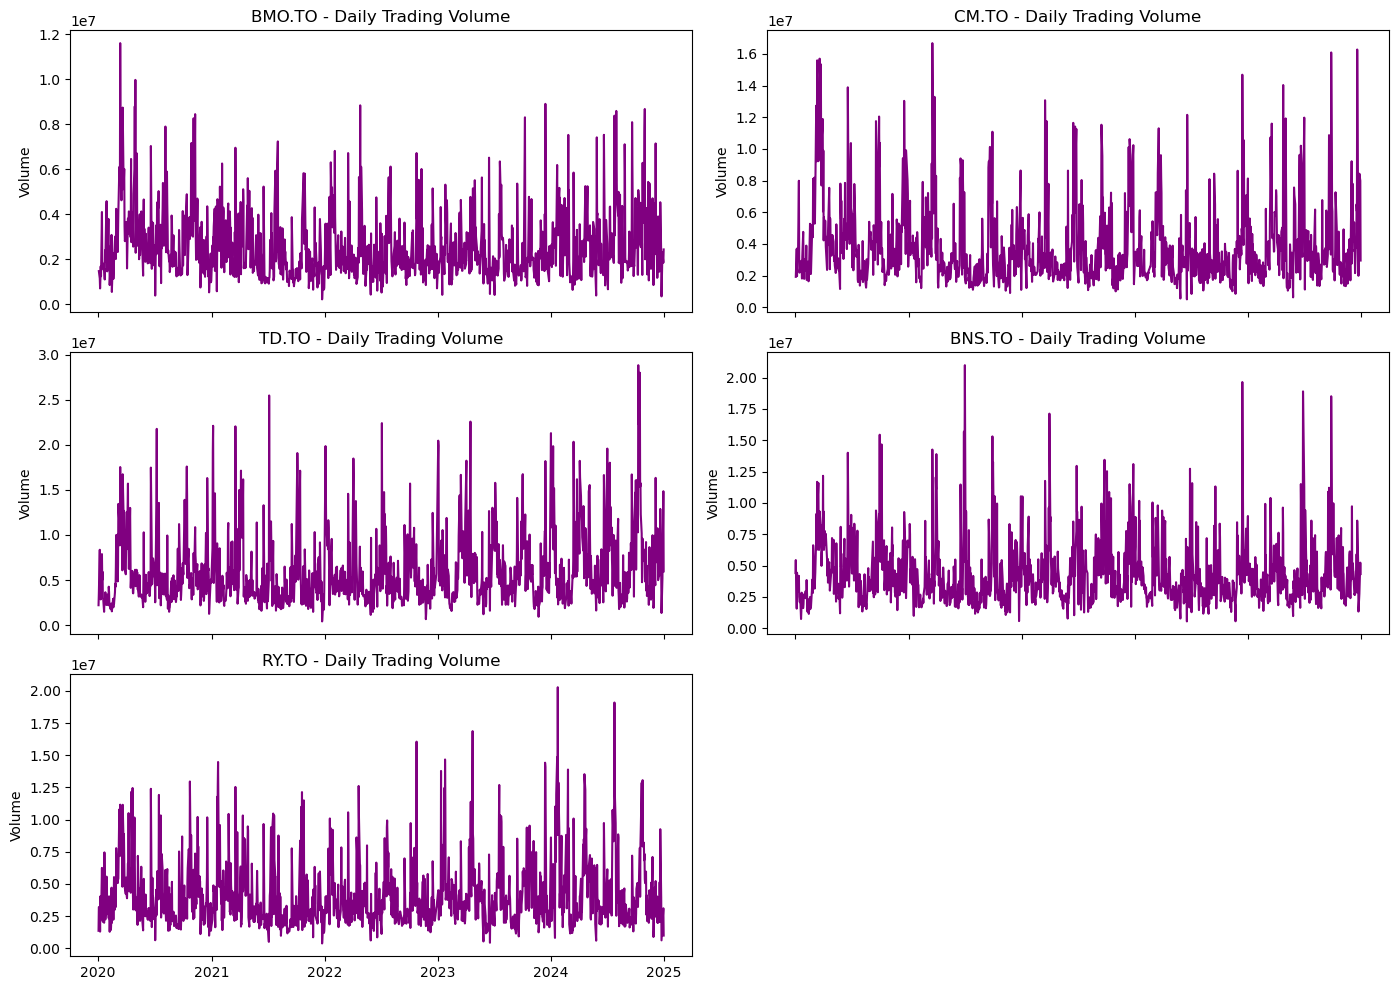

In [16]:
# Define stock tickers
bank_tickers = df["stock_ticker"].unique()

# Set up subplots in a 2-column layout
rows = int(np.ceil(len(bank_tickers) / 2))  # Calculate required rows
fig, axes = plt.subplots(rows, 2, figsize=(14, 10), sharex=True)

# Flatten axes array if needed
axes = axes.flatten()

# Loop through banks and plot trading volume
for i, stock in enumerate(bank_tickers):
    stock_data = df[df["stock_ticker"] == stock]
    axes[i].plot(stock_data["date"], stock_data["volume"], color="purple")
    axes[i].set_title(f"{stock} - Daily Trading Volume")
    axes[i].set_ylabel("Volume")

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

axes[-1].set_xlabel("Date")  # Add x-axis label only on the last subplot
plt.tight_layout()
plt.show()

On this charts we can see daily trading volume trends over time.
Spikes in volume, which may indicate high-interest trading days.

**Insights from the Charts:**


- All stocks show high volatility in trading volume, with frequent spikes.
- The spikes likely represent significant market events, earnings reports, or macroeconomic factors affecting trading activity.

- There appear to be recurring trends each year, possibly indicating seasonal trading behavior.
- These could be linked to quarterly earnings releases or economic cycles.

- Among the stocks, TD.TO seems to experience the highest peaks, reaching above 25 million in trading volume.
- This suggests TD Bank might be the most actively traded stock in this group.

- In several stocks (e.g., RY.TO and TD.TO), trading volume appears to be increasing slightly over time.
- This could indicate growing investor interest or increased market activity.

- CM.TO and BMO.TO show similar patterns of trading volume with frequent spikes.
- BNS.TO seems to have relatively fewer extreme spikes compared to the others.

## Correlation Analysis

In [17]:
#  Compute Daily Returns
df["daily_return"] = df.groupby("stock_ticker")["close_price"].pct_change()

In [18]:
#Calculate Correlation Between Stock Returns

correlation_matrix = df.pivot(index="date", columns="stock_ticker", values="daily_return").corr()
print(correlation_matrix)

stock_ticker    BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
stock_ticker                                                  
BMO.TO        1.000000  0.815929  0.828345  0.801760  0.777643
BNS.TO        0.815929  1.000000  0.814090  0.795693  0.797678
CM.TO         0.828345  0.814090  1.000000  0.805357  0.739761
RY.TO         0.801760  0.795693  0.805357  1.000000  0.782565
TD.TO         0.777643  0.797678  0.739761  0.782565  1.000000


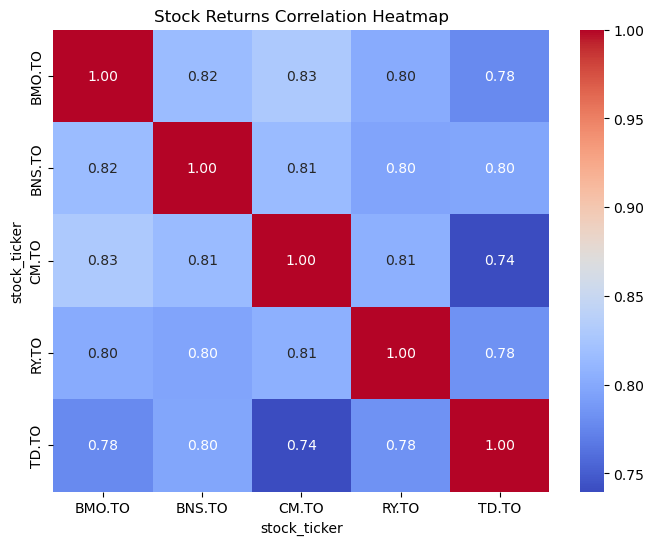

In [19]:
# Visualize Correlation with a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Returns Correlation Heatmap")
plt.show()

A correlation matrix is created to measure how the returns of these stocks move together (values range from -1 to 1).
Higher correlation (close to 1): Stocks tend to move together.
Lower correlation (closer to 0): Stocks move independently.

**Insights from the Correlation Matrix and Heatmap:**

- All banks exhibit a strong positive correlation, meaning they tend to move in the same direction.
- This is expected since they operate in the same financial sector and are influenced by similar macroeconomic factors (e.g., interest rates, inflation, banking regulations)
- CM.TO and BMO.TO (0.83) and TD.TO and CM.TO (0.83) show the highest correlations.This suggests that these banks may have similar investor sentiment and exposure to market risks.
- TD.TO has the weakest correlations (0.74 - 0.78) compared to other banks. While still positively correlated, TD Bank's stock movements are slightly more independent, possibly due to different business strategies or international exposure.

Why Does This Happen?

- Banks react similarly to economic conditions like interest rate changes, central bank policies, and market liquidity.
- Investors often trade bank stocks as a group, leading to high correlations.
- TD.TO's slightly lower correlation could be due to different geographical exposure (TD has a strong U.S. presence compared to other banks).

 ### Computing Correlation and P-Values
 
A correlation close to 1 means a strong positive relationship (prices move together).
A correlation close to -1 means a strong negative relationship.
A p-value < 0.05 suggests a statistically significant correlation.

In [21]:
from scipy.stats import pearsonr

# Drop rows with any missing values before computing correlation
df_pivot_clean = df_pivot.dropna()

# Compute correlation matrix
correlation_matrix = df_pivot_clean.corr()

# Compute p-values
p_values = pd.DataFrame(np.zeros((len(df_pivot_clean.columns), len(df_pivot_clean.columns))),
                        columns=df_pivot_clean.columns, index=df_pivot_clean.columns)

for col1 in df_pivot_clean.columns:
    for col2 in df_pivot_clean.columns:
        if col1 != col2:
            corr, p = pearsonr(df_pivot_clean[col1], df_pivot_clean[col2])
            p_values.loc[col1, col2] = p
        else:
            p_values.loc[col1, col2] = np.nan  # NaN for self-correlation

# Display results
print("Correlation Matrix:\n", correlation_matrix)
print("\nP-Values:\n", p_values)


Correlation Matrix:
 stock_ticker    BMO.TO    BNS.TO     CM.TO     RY.TO     TD.TO
stock_ticker                                                  
BMO.TO        1.000000  0.956802  0.847728  0.864577  0.947328
BNS.TO        0.956802  1.000000  0.931033  0.917282  0.898913
CM.TO         0.847728  0.931033  1.000000  0.936824  0.737581
RY.TO         0.864577  0.917282  0.936824  1.000000  0.766264
TD.TO         0.947328  0.898913  0.737581  0.766264  1.000000

P-Values:
 stock_ticker  BMO.TO  BNS.TO          CM.TO          RY.TO          TD.TO
stock_ticker                                                             
BMO.TO           NaN     0.0   0.000000e+00   0.000000e+00   0.000000e+00
BNS.TO           0.0     NaN   0.000000e+00   0.000000e+00   0.000000e+00
CM.TO            0.0     0.0            NaN   0.000000e+00  9.594817e-216
RY.TO            0.0     0.0   0.000000e+00            NaN  8.859894e-243
TD.TO            0.0     0.0  9.594817e-216  8.859894e-243            NaN


1. Correlation Matrix
The values range from -1 to 1:

1.0000 means perfect positive correlation (same stock vs. itself).
Close to 1 (e.g., 0.95, 0.93) means strong positive correlation → stocks tend to move in the same direction.
Close to 0 means weak or no correlation.
Negative values (not present here) would indicate an inverse relationship.
Observations:

BMO.TO and TD.TO have a strong correlation of 0.9473 → their stock prices tend to move together.
CM.TO and RY.TO also have a strong correlation (0.936), suggesting a similar trend.
The lowest correlation is between TD.TO and CM.TO (0.7375), meaning they are less synchronized.

2. P-Values (Statistical Significance)
Small p-values (< 0.05 or very close to 0) indicate that the correlation is statistically significant (not due to random chance).
P-values here are mostly 0 or extremely small (e.g., 8.85e-243), meaning the correlations are highly significant.

Conclusion

All the stocks are positively correlated, meaning they generally move in the same direction.
The strong correlations suggest that the Canadian banking sector stocks have similar price trends, likely influenced by economic factors affecting all banks.
The p-values confirm that these correlations are statistically significant.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


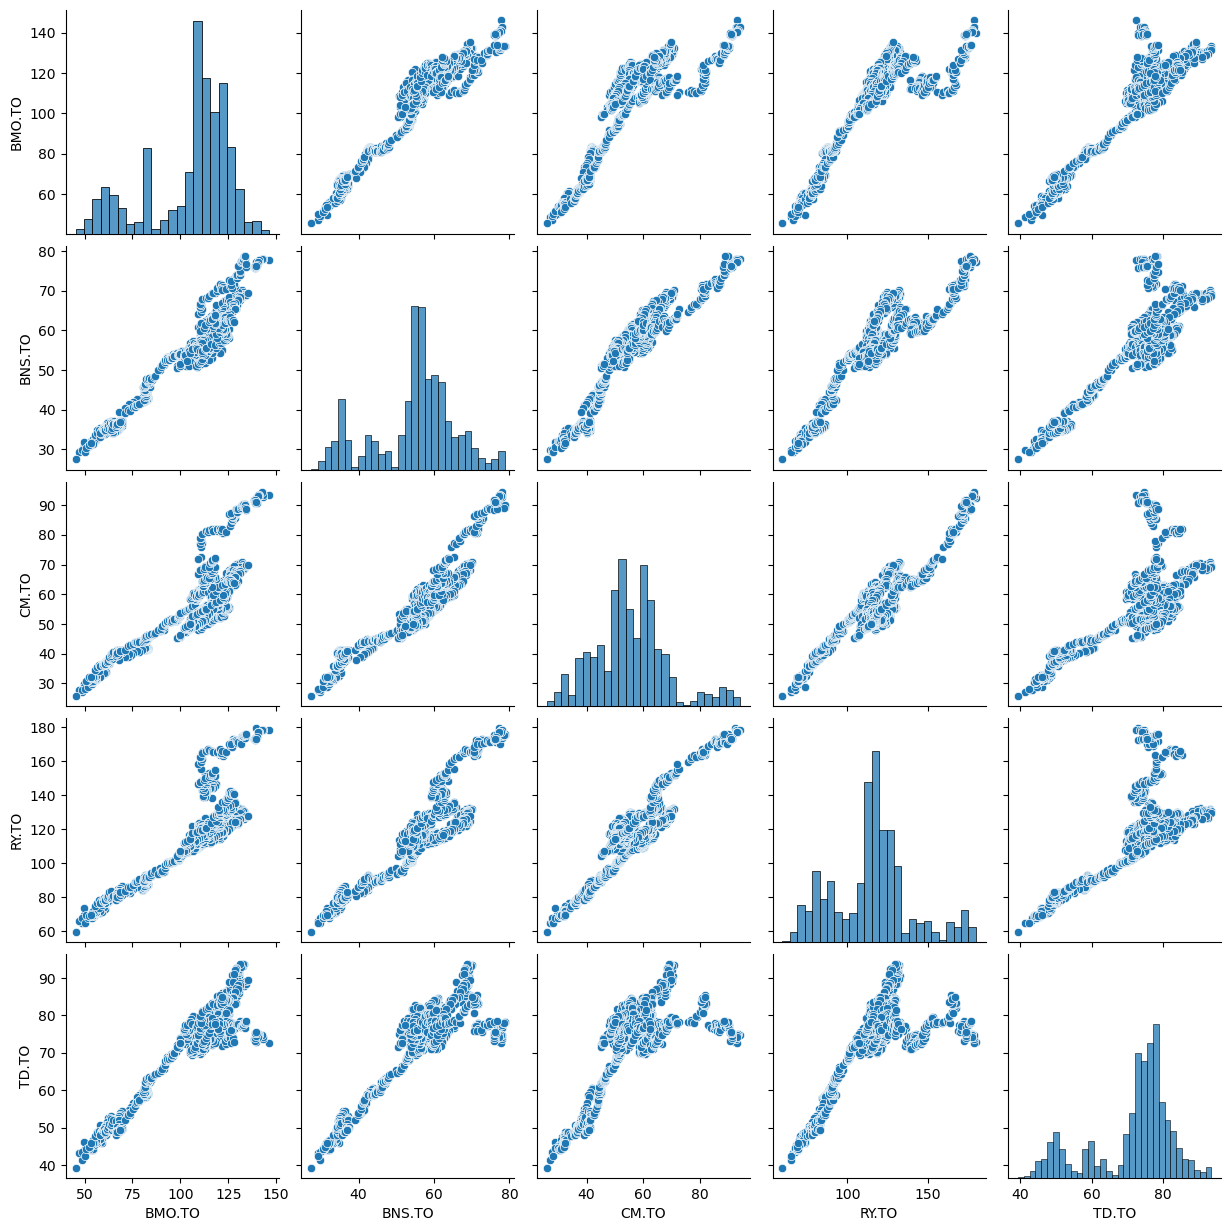

In [22]:
sns.pairplot(df_pivot)
plt.show()

**Diagonal Histograms**

The diagonal plots show the distribution of each stock’s prices.
Most distributions seem right-skewed, meaning prices are more concentrated at lower values but have a long tail toward higher prices.

**Scatterplots**

The off-diagonal plots show scatterplots comparing different stocks.
The linear patterns in most scatterplots indicate a strong positive correlation, which aligns with the high correlation values from your matrix.
Some relationships appear more tightly clustered (higher correlation), while others have a bit more spread.

**Takeaways:**

Stocks from different banks move in a similar pattern, confirming a strong positive correlation.
The distributions show price trends, which might indicate which stocks are more volatile or stable.

### Calculate Daily Returns
Let’s dive deeper into understanding the risk of these stocks. Instead of just looking at absolute price values, we need to analyze daily returns—the percentage change in price from one day to the next.
The daily return measures the percentage change in stock price from one day to the next. It helps assess the volatility and risk of a stock.

- 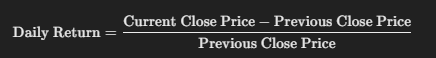


In [24]:
df["daily_return"] = df.groupby("stock_ticker")["close_price"].pct_change()

In [25]:
#Analyze the Average Daily Return
avg_daily_return = df.groupby("stock_ticker")["daily_return"].mean()
print(avg_daily_return)

stock_ticker
BMO.TO    0.000580
BNS.TO    0.000585
CM.TO     0.000749
RY.TO     0.000657
TD.TO     0.000325
Name: daily_return, dtype: float64


A histogram can help visualize the distribution of daily returns (**volatility**):
- A wider spread means higher volatility (risk).
- A narrow spread means lower volatility (stability).

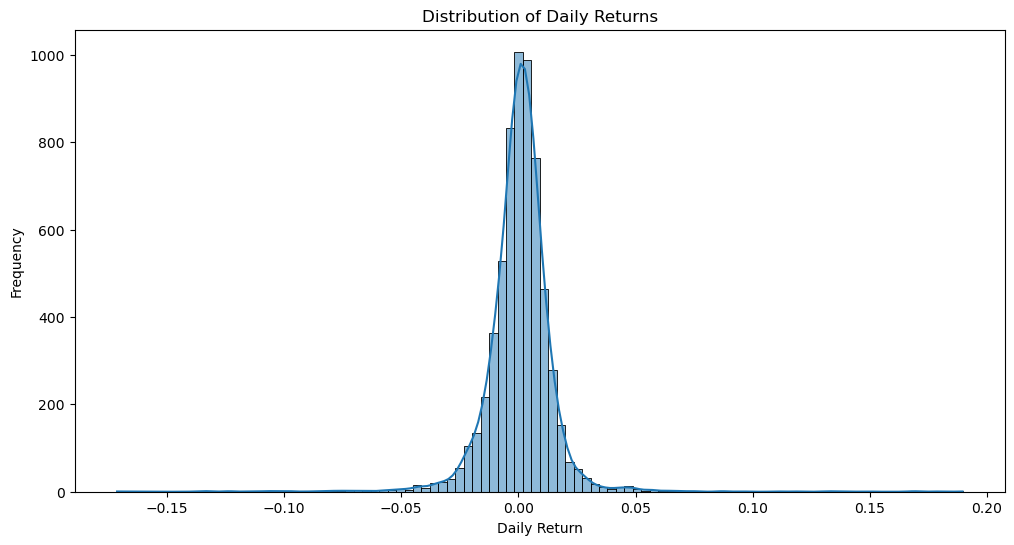

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df["daily_return"].dropna(), bins=100, kde=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

In [30]:
# Compare Volatility Across Banks This tells which bank's stock is the most volatile.

volatility = df.groupby("stock_ticker")["daily_return"].std()
# Display volatility values
print(volatility)

stock_ticker
BMO.TO    0.016582
BNS.TO    0.014967
CM.TO     0.015427
RY.TO     0.013178
TD.TO     0.015149
Name: daily_return, dtype: float64


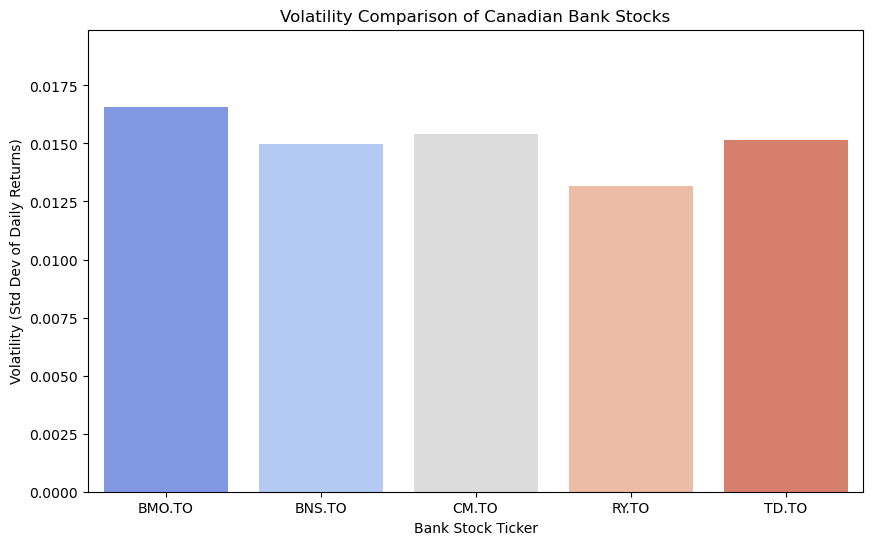

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=volatility.index, y=volatility.values, palette="coolwarm")

# Labels and title
plt.xlabel("Bank Stock Ticker")
plt.ylabel("Volatility (Std Dev of Daily Returns)")
plt.title("Volatility Comparison of Canadian Bank Stocks")
plt.ylim(0, max(volatility.values) * 1.2)  # Adjust y-axis for better visibility

plt.show()

The bar chart compares the standard deviation of daily returns for each bank, representing their volatility.

BMO.TO and TD.TO exhibit the highest volatility, suggesting they experience larger fluctuations in stock prices.

RY.TO has the lowest volatility, indicating more price stability.

BNS.TO and CM.TO have moderate volatility levels.

**Insights:**
    
- Higher volatility (BMO.TO, TD.TO) may indicate higher risk but also greater potential returns.
- Lower volatility (RY.TO) suggests a more stable stock, which could be preferred by conservative investors.
- Investors should consider volatility alongside other financial indicators before making decisions.

## Monte Carlo Simulation for Prediction

In [23]:
df

,stock_ticker,date,close_price,high_price,low_price,open_price,volume,SMA_50,SMA_100,SMA_500,EMA_50,EMA_100,EMA_500,daily_return
0,BMO.TO,2020-01-03,80.279427,80.335287,79.593141,79.880423,1473000,NaN,NaN,NaN,80.279427,80.279427,80.279427,NaN
1,BMO.TO,2020-01-06,80.215599,80.239544,79.856499,79.888420,1147500,NaN,NaN,NaN,80.276924,80.278163,80.279172,-0.000795
2,BMO.TO,2020-01-07,80.079941,80.622585,80.048020,80.239546,702000,NaN,NaN,NaN,80.269199,80.274237,80.278376,-0.001691
3,BMO.TO,2020-01-08,80.662498,81.101398,80.199653,80.215611,1088400,NaN,NaN,NaN,80.284622,80.281926,80.279910,0.007275
4,BMO.TO,2020-01-09,80.957748,81.213110,80.702387,80.997651,1683900,NaN,NaN,NaN,80.311019,80.295308,80.282616,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,RY.TO,2024-12-23,173.449997,173.869995,172.610001,173.000000,3932200,173.565855,166.640144,133.768959,172.685196,166.622144,139.333638,0.000288
6269,RY.TO,2024-12-24,173.529999,173.740005,173.050003,173.529999,610300,173.633966,166.864230,133.878564,172.718326,166.758934,139.470150,0.000461
6270,RY.TO,2024-12-27,174.360001,174.500000,173.440002,173.440002,1846800,173.682180,167.130436,133.992339,172.782705,166.909450,139.609431,0.004783
6271,RY.TO,2024-12-30,173.059998,173.589996,172.289993,173.000000,3103600,173.680788,167.393660,134.102167,172.793579,167.031243,139.742966,-0.007456


In [24]:
# Load your dataframe (assuming it's named df)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select a stock (Example: BMO.TO)
stock = 'BMO.TO'
df_stock = df[df['stock_ticker'] == stock].copy()

# Sort by date
df_stock = df_stock.sort_index()

# Calculate daily returns
df_stock['daily_return'] = df_stock['close_price'].pct_change()
df_stock.dropna(inplace=True)

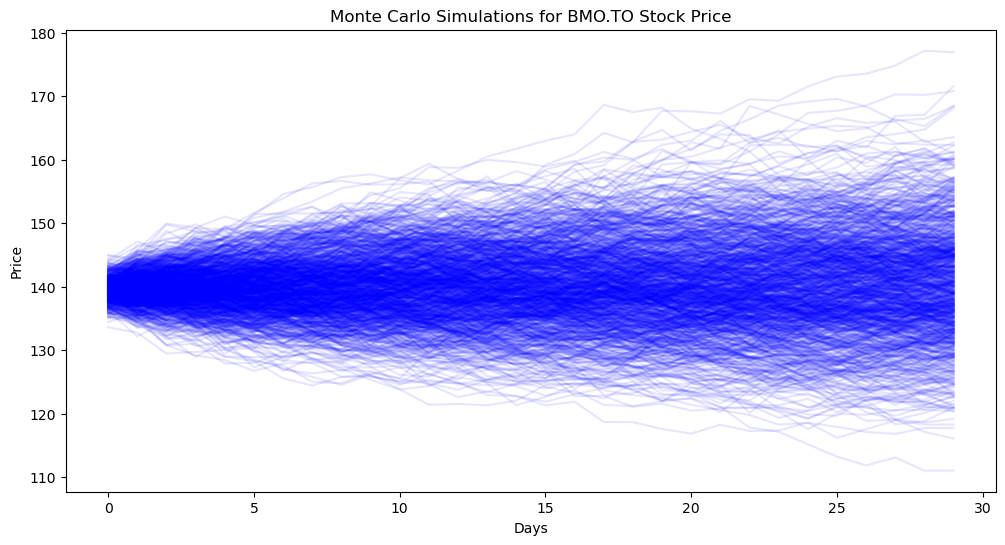

In [25]:
# Simulation Parameters
num_simulations = 1000  # Number of simulated price paths
num_days = 30  # Forecasting horizon

# Extract key statistics
last_price = df_stock['close_price'].iloc[-1]
mu = df_stock['daily_return'].mean()
sigma = df_stock['daily_return'].std()

# Generate Monte Carlo simulations
simulations = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        price_series.append(price_series[-1] * (1 + np.random.normal(mu, sigma)))
    simulations[:, i] = price_series[1:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(simulations, alpha=0.1, color='blue')
plt.title(f'Monte Carlo Simulations for {stock} Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

Expected Price (Mean): 140.63
5th Percentile (Worst Case): 126.37
95th Percentile (Best Case): 155.74


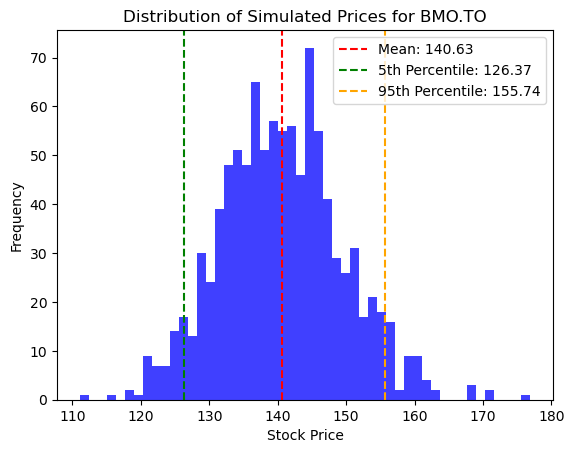

In [26]:
#Analyze Results

# Extract final prices from simulations
final_prices = simulations[-1, :]

# Compute statistics
mean_price = np.mean(final_prices)
percentile_5 = np.percentile(final_prices, 5)  # Worst case
percentile_95 = np.percentile(final_prices, 95)  # Best case

print(f"Expected Price (Mean): {mean_price:.2f}")
print(f"5th Percentile (Worst Case): {percentile_5:.2f}")
print(f"95th Percentile (Best Case): {percentile_95:.2f}")

# Histogram
plt.hist(final_prices, bins=50, alpha=0.75, color='blue')
plt.axvline(mean_price, color='r', linestyle='dashed', label=f'Mean: {mean_price:.2f}')
plt.axvline(percentile_5, color='g', linestyle='dashed', label=f'5th Percentile: {percentile_5:.2f}')
plt.axvline(percentile_95, color='orange', linestyle='dashed', label=f'95th Percentile: {percentile_95:.2f}')
plt.title(f'Distribution of Simulated Prices for {stock}')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Automate for All Banks**

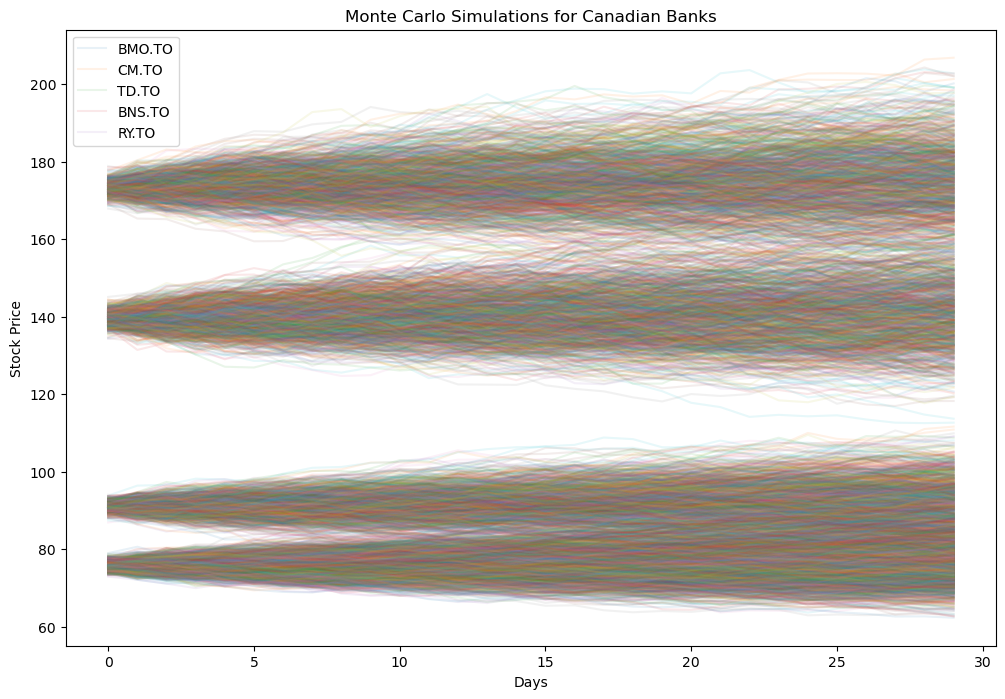


🔹 Monte Carlo Simulation Results 🔹

              Mean  5% (Worst Case)  95% (Best Case)
BMO.TO  140.941106       126.813601       156.084502
CM.TO    92.628207        82.958676       102.676923
TD.TO    75.293199        68.108973        83.224713
BNS.TO   76.670756        69.378323        84.756724
RY.TO   175.911182       161.424729       192.033513


In [27]:
# List of banks
banks = df['stock_ticker'].unique()
num_simulations = 1000  # Number of Monte Carlo paths
num_days = 30  # Forecasting horizon

# Store results
summary = {}

# Monte Carlo Simulation for each bank
plt.figure(figsize=(12, 8))

for bank in banks:
    df_stock = df[df['stock_ticker'] == bank].copy().sort_index()
    df_stock['daily_return'] = df_stock['close_price'].pct_change()
    df_stock.dropna(inplace=True)

    # Extract parameters
    last_price = df_stock['close_price'].iloc[-1]
    mu = df_stock['daily_return'].mean()
    sigma = df_stock['daily_return'].std()

    # Monte Carlo simulation
    simulations = np.zeros((num_days, num_simulations))

    for i in range(num_simulations):
        price_series = [last_price]
        for _ in range(num_days):
            price_series.append(price_series[-1] * (1 + np.random.normal(mu, sigma)))
        simulations[:, i] = price_series[1:]

    # Calculate final price statistics
    final_prices = simulations[-1, :]
    mean_price = np.mean(final_prices)
    percentile_5 = np.percentile(final_prices, 5)  # Worst case
    percentile_95 = np.percentile(final_prices, 95)  # Best case

    # Store results
    summary[bank] = {'Mean': mean_price, '5% (Worst Case)': percentile_5, '95% (Best Case)': percentile_95}

    # Plot results
    plt.plot(simulations, alpha=0.1, label=bank)

plt.title('Monte Carlo Simulations for Canadian Banks')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(banks, loc='upper left')
plt.show()

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary).T
print("\n🔹 Monte Carlo Simulation Results 🔹\n")
print(summary_df)

### Conclusion on Monte Carlo Simulation for Canadian Banks
This Monte Carlo simulation models the potential future stock prices of five major Canadian banks (BMO.TO, CM.TO, TD.TO, BNS.TO, and RY.TO) over a 30-day period. The simulation runs multiple trials, creating a range of possible outcomes for each stock.

**Key Takeaways:**
**Stock Price Uncertainty:**

- The simulation shows a wide spread of possible stock prices, indicating uncertainty in future price movements.
- More variation (wider spread) suggests higher volatility.

**Mean, Best-Case, and Worst-Case Scenarios:**

- BMO.TO and RY.TO have the highest mean projected prices (140.94 and 175.01, respectively), indicating stronger expected performance.
- CM.TO, TD.TO, and BNS.TO have lower mean projected prices, suggesting relatively weaker expected growth.
- The 5% worst-case scenario values show the lowest expected price in a bad market condition, while the 95% best-case scenario values represent a potential upside in a strong market.

**Risk Assessment:**

- RY.TO has the highest upside potential but also exhibits wider price fluctuations, indicating higher risk.
- TD.TO and BNS.TO have relatively lower expected price ranges, suggesting more stability but limited upside.

**Investment Implications:**

- Conservative investors may prefer TD.TO or BNS.TO for lower volatility.
- Risk-tolerant investors could consider RY.TO or BMO.TO for potential higher returns, but they must be prepared for significant price swings.
- Portfolio diversification within the banking sector may still carry risk due to high correlation among these stocks.

**Conclusion:**
Monte Carlo simulations https://www.investopedia.com/terms/m/montecarlosimulation.asp provide a probabilistic view of future prices, helping investors make informed decisions based on risk tolerance and expected returns. However, real-world factors like economic policies, interest rates, and market sentiment can influence outcomes beyond simulated projections.